In [1]:
# Import necessary libraries
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt

# Define paths to image and mask folders
images_folder = r"C:\Users\nande\OneDrive\Desktop\Diabetic_Retinopathy\output\test\retina_images"  # Path for images
masks_folder = r"C:\Users\nande\OneDrive\Desktop\Diabetic_Retinopathy\output\test\mask_images"     # Path for masks

# Parameters
IMG_SIZE = (128, 128)

# 1. Data Loading and Preprocessing
def load_images_and_masks(images_folder, masks_folder, img_size=(128, 128)):
    images = []
    masks = []
    
    image_files = sorted(os.listdir(images_folder))  # Sorted to match images and masks by order
    mask_files = sorted(os.listdir(masks_folder))
    
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(images_folder, img_file)
        mask_path = os.path.join(masks_folder, mask_file)
        
        # Load and resize image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalize to [0, 1]
        images.append(img)
        
        # Load and resize mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        mask = mask / 255.0  # Normalize to [0, 1]
        masks.append(mask)
    
    images = np.array(images)
    masks = np.array(masks).reshape(-1, img_size[0], img_size[1], 1)
    return images, masks

In [2]:
# Load and preprocess images and masks  
images, masks = load_images_and_masks(images_folder, masks_folder)

In [3]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

In [4]:
# Define a simple U-Net model for segmentation
def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    
    u6 = layers.UpSampling2D((2, 2))(c4)
    u6 = layers.concatenate([u6, c3])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.UpSampling2D((2, 2))(c6)
    u7 = layers.concatenate([u7, c2])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)
    
    u8 = layers.UpSampling2D((2, 2))(c7)
    u8 = layers.concatenate([u8, c1])
    c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c8)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c8)
    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Initialize and train the model
model = unet_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=4)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9165 - loss: 0.2343 - val_accuracy: 0.9846 - val_loss: 0.0195
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9852 - loss: 0.0168 - val_accuracy: 0.9866 - val_loss: 0.0116
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9863 - loss: 0.0126 - val_accuracy: 0.9868 - val_loss: 0.0119
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9865 - loss: 0.0110 - val_accuracy: 0.9870 - val_loss: 0.0096
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9863 - loss: 0.0107 - val_accuracy: 0.9871 - val_loss: 0.0091
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9867 - loss: 0.0094 - val_accuracy: 0.9871 - val_loss: 0.0089
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9864 - loss: 0.0100 - val_accuracy: 0.9871 - val_loss: 0.0086
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9866 - loss: 0.0093 - val_accuracy: 0.9872 - v

In [20]:
# Predict and visualize results
def plot_sample_predictions(model, X_test, y_test, num_samples=3):
    plt.figure(figsize=(10, num_samples * 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(X_test))
        test_image = X_test[idx]
        true_mask = y_test[idx]
        pred_mask = model.predict(test_image[np.newaxis, ...])[0]

        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(test_image)
        plt.title("Original Image")

        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(true_mask.squeeze(), cmap="gray")
        plt.title("Ground Truth Mask")

        plt.subplot(num_samples, 3, i * 3 + 3)
        plt.imshow(pred_mask.squeeze(),cmap="plasma")
        plt.title("Predicted Mask")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


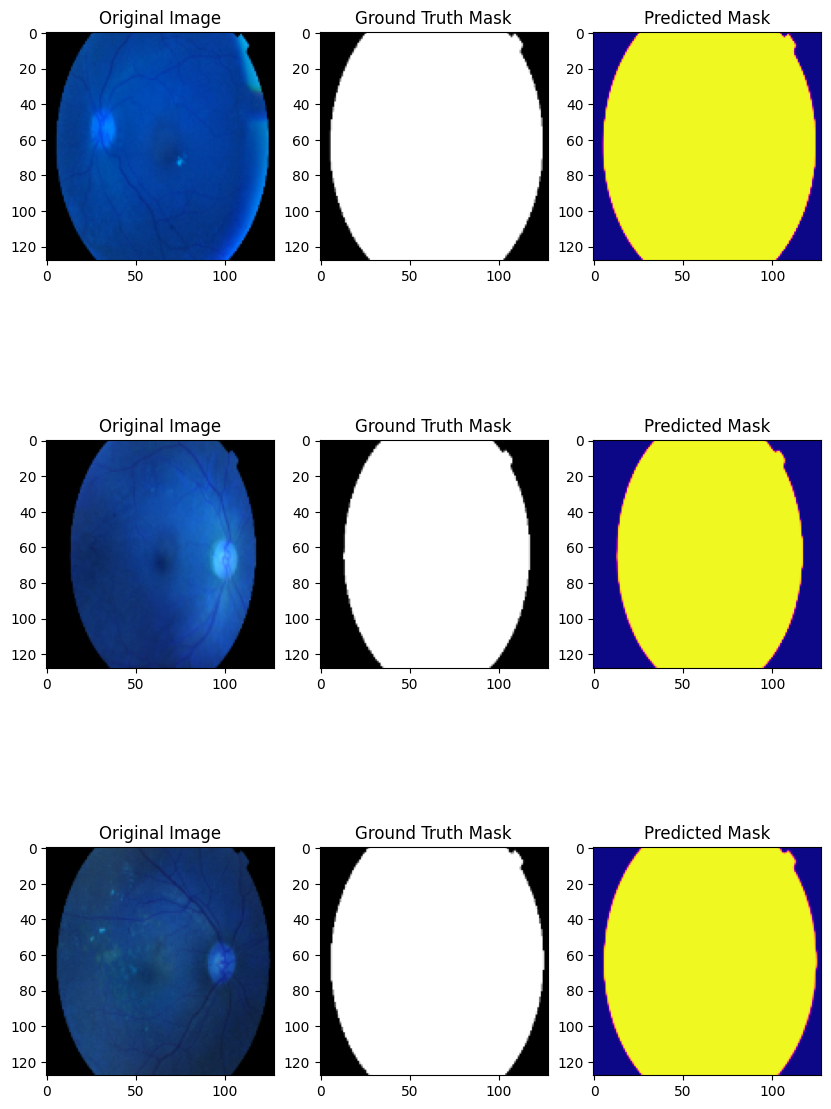

In [22]:
# Visualize predictions
plot_sample_predictions(model, X_test, y_test, num_samples=3)